In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(A):
    return 1/(1 + np.exp(-A))

def sigmoid_derivate(A):
    return A*(1-A)

class NeuralNetwork:
    def __init__(self, num_capas, neuronas_por_capa, num_entradas, alfa):
        
        self.num_capas = num_capas
        self.num_entradas = num_entradas
        
        #Configurando los pesos W de la capa 1.
        neuronas_capa_inicial = neuronas_por_capa[0]
        self.W_capas = [np.random.uniform(-1, 1, neuronas_capa_inicial*(num_entradas+1)).reshape((neuronas_capa_inicial, num_entradas+1))]
        
        #Configurando los pesos W de las capas posteriores.
        for i in range(1, num_capas):
            neuronas_capa_i = neuronas_por_capa[i]
            num_entradas_capa = neuronas_por_capa[i-1]
            self.W_capas.append(np.random.uniform(-1, 1, neuronas_capa_i*(num_entradas_capa+1)).reshape((neuronas_capa_i, num_entradas_capa+1)))
            
        self.alfa = alfa
        
    def train(self, X, T, epocas):
        #for W in self.W_capas:
        #    print(W)
        #    print()
            
        #Se aumentan los vectores de entrada para incluir el bias.
        bias = -np.ones((np.shape(X)[0], 1))
        X_a = np.concatenate([X, bias], axis = 1)
        
        for i in range(epocas):
            
            #Se recorren todos los patrones de entrenamiento.
            for x, t in zip(X_a, T):
                
                #print(f"T shape: {np.shape(np.reshape(t, (-1, 1)))}")
                resultados_capas = [np.reshape(x, (-1, 1))]
                deltas_capas = [None] * self.num_capas
                
                #Se calcula la salida de la primera capa.
                mult_res = np.matmul(self.W_capas[0], np.reshape(x, (-1, 1)))
                sigmoid_res = sigmoid(mult_res)
                resultados_capas.append(np.vstack([sigmoid_res, [-1]]))
                
                for capa in range(1, num_capas):
                    #Se aumenta el vector de la capa anterior para incluir el bias.
                    res_capa_previa = np.vstack([sigmoid_res, [-1]])
                    mult_res = np.matmul(self.W_capas[capa], res_capa_previa)
                    sigmoid_res = sigmoid(mult_res)
                    resultados_capas.append(np.vstack([sigmoid_res, [-1]]))
                    
                #Salida de la red:
                #print(f"Obtenido: {sigmoid_res}")
                #print(f"Esperado: {np.reshape(t, (-1, 1))}")
                #print(f"Diferencia: {np.reshape(t, (-1, 1)) - sigmoid_res}")
                #print(f"Derivada: {sigmoid_derivate(sigmoid_res)}")
                delta_salida = sigmoid_derivate(sigmoid_res)*(np.reshape(t, (-1, 1)) - sigmoid_res)
                #print(f"Delta salida: {delta_salida}")
                deltas_capas[-1] = delta_salida
                
                #print(f"Resultados: ")
                #print(resultados_capas)
                
                #print(f"Deltas: ")
                #print(deltas_capas)
                
                #print(f"Res anterior T: {np.transpose(resultados_capas[-1-1])}")
                
                delta_w = self.alfa * np.matmul(deltas_capas[-1], np.transpose(resultados_capas[-1-1]))
                #print(f"Delta_w: {delta_w}")
                #print(f"W final: {self.W_capas[-1]}")
                self.W_capas[-1] += delta_w
                #print(f"Nuevo W final: {self.W_capas[-1]}")
                
                #print()
                
                for i in range(1, self.num_capas):
                    #print(f"Entrenando la capa: {self.num_capas - i}")
                    #print(f"Res anterior T: {np.transpose(resultados_capas[-1-1-i])}")
                    #print(f"W sig T: {np.transpose(self.W_capas[-i])}")
                    #print(f"Delta anterior T: {deltas_capas[-i]}")
                    sum_delta_w = np.matmul(np.transpose(self.W_capas[-i]), deltas_capas[-i])
                    #print(f"Dot product: {sum_delta_w}")
                    #print(f"Resultado capa: {resultados_capas[-1-i]}")
                    #print(f"Derivada: {sigmoid_derivate(resultados_capas[-1-i])}")
                    delta = sigmoid_derivate(resultados_capas[-1-i])*sum_delta_w
                    deltas_capas[-1-i] = delta[:-1, :]
                    #print(f"Delta: {delta}")
                    
                    delta_w = self.alfa * np.matmul(delta[:-1, :], np.transpose(resultados_capas[-1-1-i]))
                    #print(f"Delta shape: {np.shape(delta_w)}")
                    #print(f"W shape: {np.shape(self.W_capas[-1-i])}")
                    #print(f"Delta_w: {delta_w}")
                    #print(f"W final: {self.W_capas[-1-i]}")
                    self.W_capas[-1-i] += delta_w
                    #print(f"Nuevo W final: {self.W_capas[-1-i]}")
                                        
            

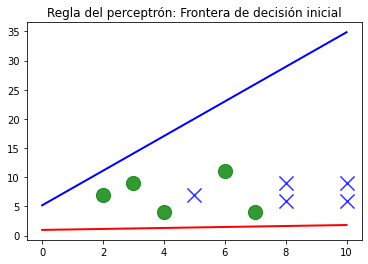

In [56]:
num_capas = 2
neuronas_por_capa = [2, 1]
num_entradas = 2
alfa = 0.1
NN = NeuralNetwork(num_capas, neuronas_por_capa, num_entradas, alfa)
#NN.train(X, T)

X = np.array([[2.0, 7.0], [3.0, 9.0], [4.0, 4.0], [6.0, 11.0], [7.0, 4.0], [5.0, 7.0], [8.0, 6.0], [8.0, 9.0], [10.0, 6.0], [10.0, 9.0]])
T = np.array([[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0]])

x1 = np.linspace(0, 10)
x2 = (NN.W_capas[0][0, 2] / NN.W_capas[0][0, 1]) - (x1 * NN.W_capas[0][0, 0] / NN.W_capas[0][0, 1])
x3 = (NN.W_capas[0][1, 2] / NN.W_capas[0][1, 1]) - (x1 * NN.W_capas[0][1, 0] / NN.W_capas[0][1, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.plot(x1, x3, 'blue', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()


Antes: 
[array([[-3.92461316,  2.39581398, -0.05067336],
       [ 0.05437567,  1.30893887,  6.62529664]]), array([[-5.84613919,  6.28307378,  3.2142797 ]])]
Después: 
[array([[-4.17688276,  2.58319848,  0.0391932 ],
       [ 0.06179636,  1.62995065,  8.36488056]]), array([[-7.33875559,  8.14782023,  4.25139508]])]


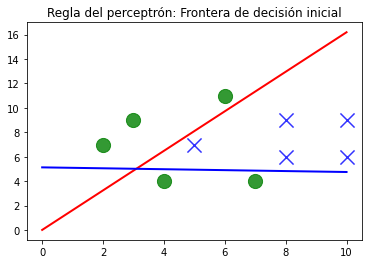

In [60]:
print("Antes: ")
print(NN.W_capas)
NN.alfa = 0.1
NN.train(X, T, 3000)
print("Después: ")
print(NN.W_capas)

X = np.array([[2.0, 7.0], [3.0, 9.0], [4.0, 4.0], [6.0, 11.0], [7.0, 4.0], [5.0, 7.0], [8.0, 6.0], [8.0, 9.0], [10.0, 6.0], [10.0, 9.0]])
T = np.array([[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [1.0], [1.0]])

x1 = np.linspace(0, 10)
x2 = (NN.W_capas[0][0, 2] / NN.W_capas[0][0, 1]) - (x1 * NN.W_capas[0][0, 0] / NN.W_capas[0][0, 1])
x3 = (NN.W_capas[0][1, 2] / NN.W_capas[0][1, 1]) - (x1 * NN.W_capas[0][1, 0] / NN.W_capas[0][1, 1])
plt.figure(1)
plt.plot(x1, x2, 'red', linewidth = 2)
plt.plot(x1, x3, 'blue', linewidth = 2)

for x, t in zip(X, T):
    if t[0] <= 0:
        plt.scatter(x[0], x[1], color = 'g', s = 200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(x[0], x[1], color = 'b', s = 200, marker = 'x', alpha = 0.8)

plt.title('Regla del perceptrón: Frontera de decisión inicial')
plt.show()